# Exploration of images

In [2]:
import os
from pathlib import Path

from dotenv import load_dotenv
load_dotenv()
root_data = os.getenv("KAGGLE_FILES_DIR")
dataset_path = Path(os.getcwd(), "..", root_data)

In [3]:
import torchvision

processed = Path(dataset_path, 'processed')
train_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'train')), transform=None)
val_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'val')), transform=None)
test_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'test')), transform=None)

In [4]:
print(f"Train dateset size: {len(train_dataset)}")
print(f"Validation dateset size: {len(val_dataset)}")
print(f"Test dateset size: {len(test_dataset)}")

64654
18472
9238


### Draw a scatterplot of image sizes

100%|██████████| 6466/6466 [01:16<00:00, 84.49it/s] 


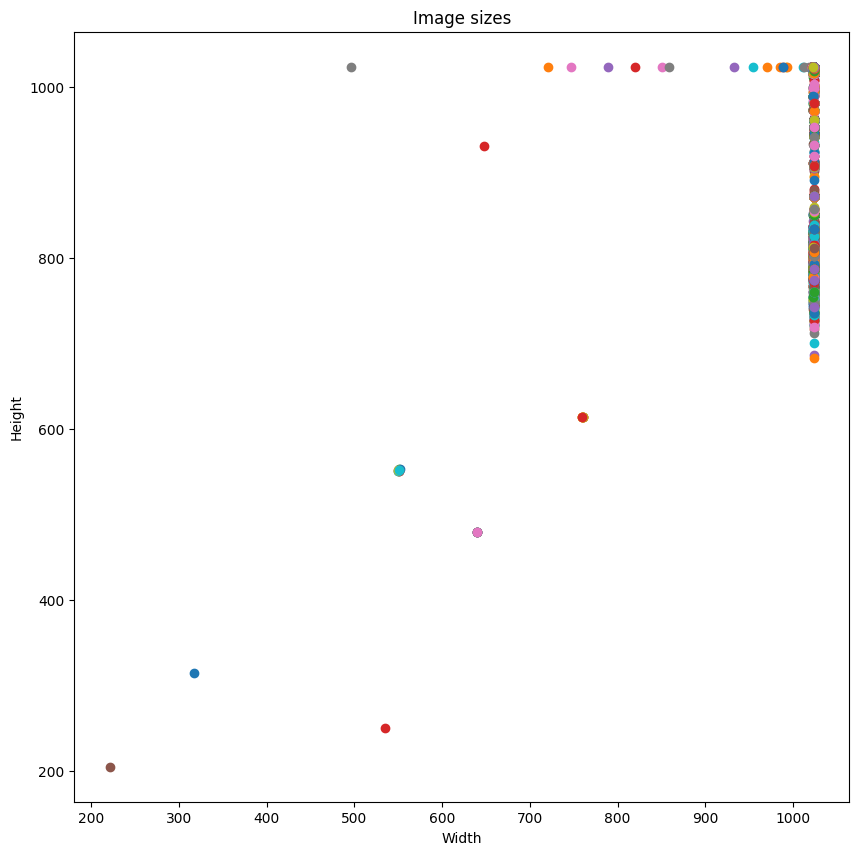

Lowest width: 221, lowest height: 205
Highest width: 1024, highest height: 1024
Average width: 1021.7677080111351, average height: 911.831425920198


In [5]:
import matplotlib.pyplot as plt
from tqdm import tqdm

highest_width = 0
highest_height = 0

lowest_width = float("inf")
lowest_height = float("inf")

avg_width = 0
avg_height = 0

figure = plt.figure(figsize=(10, 10))

ran = range(1, len(train_dataset), 10)
for _ in tqdm(ran):
    img, label = train_dataset[_]
    size = img.size
    
    avg_width += size[0]
    avg_height += size[1]
    
    if size[0] < lowest_width:
        lowest_width = size[0]
    if size[1] < lowest_height:
        lowest_height = size[1]
    
    if size[0] > highest_width:
        highest_width = size[0]
    if size[1] > highest_height:
        highest_height = size[1]
    
    plt.scatter(size[0], size[1])
    

plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image sizes")
plt.show()
print(f"Lowest width: {lowest_width}, lowest height: {lowest_height}")
print(f"Highest width: {highest_width}, highest height: {highest_height}")
print(f"Average width: {avg_width / len(ran)}, average height: {avg_height / len(ran)}")

##### The average size is close to 1024x1024, but images will be resized to 256x256, to speed up training.
##### It looks like there is very litte images smaller than this size, so information loss should be minimal.

### Add resize transformation to the datasets

In [6]:
from pathlib import Path

import torchvision
transformations = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256, 256)),
    torchvision.transforms.ToTensor(),
])
train_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'train')), transform=transformations)
val_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'val')), transform=transformations)
test_dataset = torchvision.datasets.ImageFolder(root=str(Path(processed, 'test')), transform=transformations)

### Visualize some images from train dataset

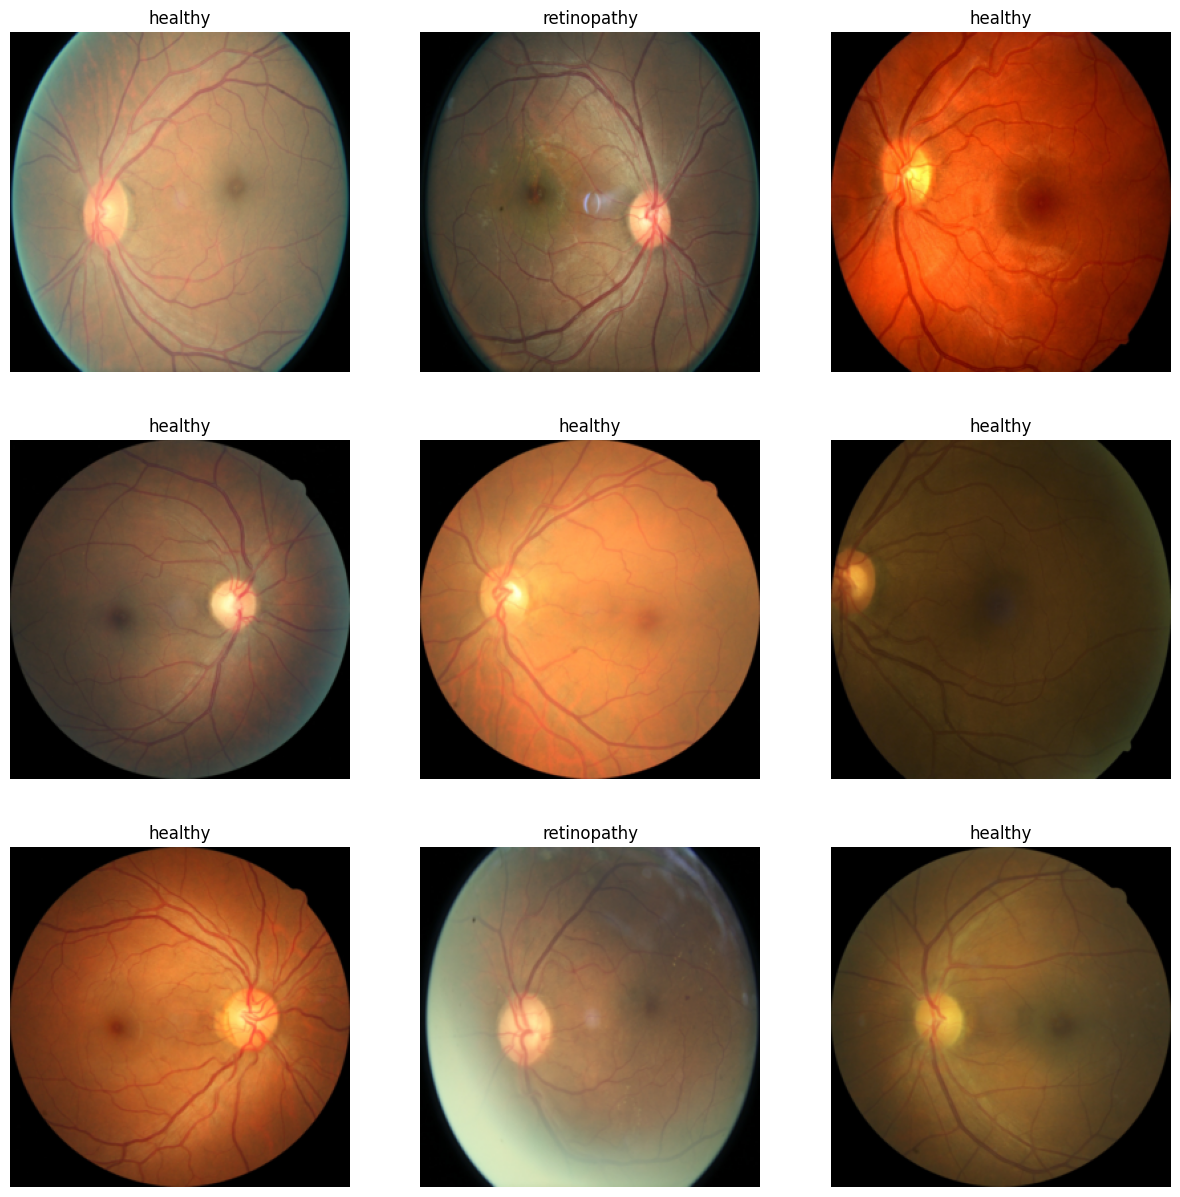

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

DR_CLASSES = {
    0: "healthy",
    1: "retinopathy",
}

figure = plt.figure(figsize=(15, 15))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(DR_CLASSES[label])
    plt.axis("off")
    img_np = img.numpy().transpose((1, 2, 0))
    # Clip pixel values to [0, 1]
    img_valid_range = np.clip(img_np, 0, 1)
    plt.imshow(img_valid_range)
    